# Supervised Learning Capstone:
## Sentiment Analysis of Hotel Reviews

The goal of this project will be to try and predict negative sentiments versus positive sentiments in a dataset containing over 500k hotel reviews. The data comes from Booking.com and includes reviews on 1,492 luxury hotels across Europe. Sentiment anaylsis can be an important tool for businesses trying to gain insight into how customers feel about their product. By being able to accurately classify reviews as either positive or negative, a company can more efficiently find what they are doing right and conversely where they need to improve. For this project I will first attempt to find a good threshold that can separate good reviews versus bad reviews (based off a reviewer's score) and then using the features from the dataset, create a model that can correctly identify a reviewer's sentiment. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [4]:
# Load data and get a quick glance
hotels = pd.read_csv(r'C:\Users\mike1\Documents\Thinkful\515k-hotel-reviews-data-in-europe.zip')
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
# Separate the dates for analysis
hotels['Month'] = pd.DatetimeIndex(hotels['Review_Date']).month
hotels['Day'] = pd.DatetimeIndex(hotels['Review_Date']).day
hotels['Year'] = pd.DatetimeIndex(hotels['Review_Date']).year

In [9]:
# Examine the dataset
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Review_Date                                   515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null flo

The data appears to be a mix of numerical and categorical features. Also, there doesn't appear to be any missing values outside of the latitude and longitude variables. Since, there is little data cleaning to be done, we can dive straight into the data exploration. 

## Data Exploration:

In [10]:
hotels.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Month,Day,Year
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803,6.486660,15.680221,2016.120761
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425,3.351779,8.864491,0.687567
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758,1.000000,1.000000,2015.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372,4.000000,8.000000,2016.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607,7.000000,16.000000,2016.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443,9.000000,23.000000,2017.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233,12.000000,31.000000,2017.000000


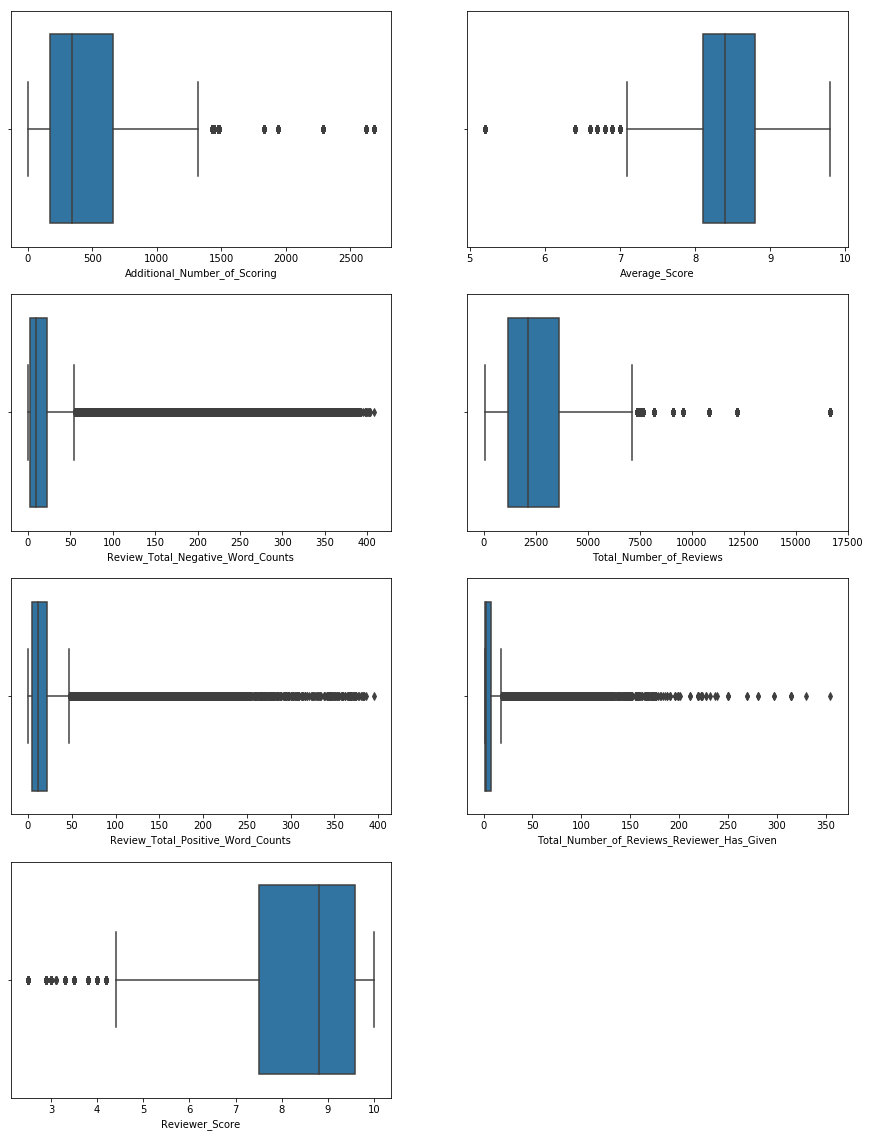

In [11]:
plt.figure(figsize = (15, 20))

plt.subplot(4, 2, 1)
sns.boxplot(hotels['Additional_Number_of_Scoring'])

plt.subplot(4, 2, 2)
sns.boxplot(hotels['Average_Score'])

plt.subplot(4, 2, 3)
sns.boxplot(hotels['Review_Total_Negative_Word_Counts'])

plt.subplot(4, 2, 4)
sns.boxplot(hotels['Total_Number_of_Reviews'])

plt.subplot(4, 2, 5)
sns.boxplot(hotels['Review_Total_Positive_Word_Counts'])

plt.subplot(4, 2, 6)
sns.boxplot(hotels['Total_Number_of_Reviews_Reviewer_Has_Given'])

plt.subplot(4, 2, 7)
sns.boxplot(hotels['Reviewer_Score'])

plt.show()

In [52]:
hotels['Reviewer_Score'].median()

8.8

Looking at the numerical features we see that some appear to be rather skewed and there are quite a number of outliers in word count variables and the total number of reviews given variable. These may need to be taken care of later on. For now, I want to focus on the reviewer score variable which will be the target variable going forward. There is not a standardized scoring method here and individuals will surely have different opinions on what a good review score is versus a bad score. For example, while one reviewer may give a review a score of 7.5 and intend for it to be a positive review, another may that same score and intend for it to be negative. This is important to consider, however I feel there is enough data here to find an acceptable threshold. The mean review score is 8.395 while the median is 8.8. Additionally, 25% of the data has been given a score below 7.5. Considering this, I think we can consider any score below 7.5 to be a negative sentiment and that will be the threshold.  

In [53]:
# Create target column 'Review' -- Positive or Negative
def review(x):
    if x < 7.5:
        return 'Negative'
    else:
        return 'Positive'

hotels['Review'] = hotels['Reviewer_Score'].apply(review)

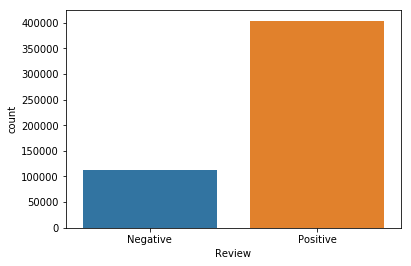

In [54]:
# Distribution of Reviews 
sns.countplot(x = 'Review', data = hotels)

One important note with our target variable is that there will be a fair amount of class imbalance since there are many more positive reviews. This will need to be addressed before modelling. For now we will continue the data exploration. 

In [12]:
# Get a look at the stats for each hotel
hotel_stats = hotels.groupby('Hotel_Name', as_index = False).mean()
hotel_stats.head()

,Hotel_Name,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Month,Day,Year
0,11 Cadogan Gardens,101.0,8.7,15.528302,393.0,19.974843,7.226415,8.845283,51.493616,-0.159235,6.987421,15.855346,2016.176101
1,1K Hotel,69.0,7.7,24.932432,663.0,15.601351,9.141892,7.861486,48.863932,2.365874,6.756757,15.817568,2016.067568
2,25hours Hotel beim MuseumsQuartier,391.0,8.8,16.161103,4324.0,21.911466,8.722787,8.983309,48.206474,16.354630,7.039187,16.319303,2015.917271
3,41,66.0,9.6,8.883495,244.0,25.300971,6.009709,9.711650,51.498147,-0.143649,6.766990,15.339806,2015.951456
4,45 Park Lane Dorchester Collection,27.0,9.4,6.750000,68.0,11.535714,7.214286,9.603571,51.506371,-0.151536,6.285714,14.928571,2016.178571


In [13]:
hotel_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1491
Data columns (total 13 columns):
Hotel_Name                                    1492 non-null object
Additional_Number_of_Scoring                  1492 non-null float64
Average_Score                                 1492 non-null float64
Review_Total_Negative_Word_Counts             1492 non-null float64
Total_Number_of_Reviews                       1492 non-null float64
Review_Total_Positive_Word_Counts             1492 non-null float64
Total_Number_of_Reviews_Reviewer_Has_Given    1492 non-null float64
Reviewer_Score                                1492 non-null float64
lat                                           1475 non-null float64
lng                                           1475 non-null float64
Month                                         1492 non-null float64
Day                                           1492 non-null float64
Year                                          1492 non-null float64
dtypes: fl

Hotel_Name
Hotel Da Vinci                                       16670.0
Park Plaza Westminster Bridge London                 12158.0
Hotel degli Arcimboldi                               10842.0
Strand Palace Hotel                                   9568.0
Britannia International Hotel Canary Wharf            9086.0
Best Western Premier Hotel Couture                    8177.0
The Student Hotel Amsterdam City                      7656.0
Golden Tulip Amsterdam West                           7586.0
DoubleTree by Hilton Hotel London Tower of London     7491.0
Glam Milano                                           7371.0
Name: Total_Number_of_Reviews, dtype: float64


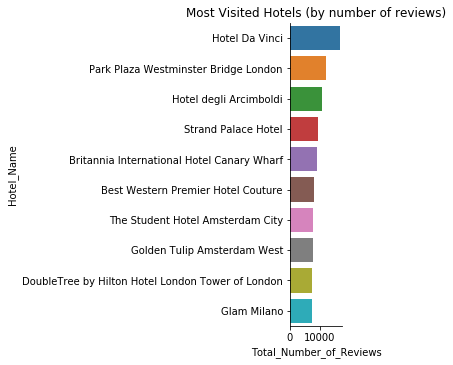

In [14]:
#Top 10 most visited hotels -- by total number of reviews
most_visited = hotels['Total_Number_of_Reviews'].groupby(hotels['Hotel_Name']).mean()
print(most_visited.nlargest(10))

sns.catplot(x = "Total_Number_of_Reviews", y = "Hotel_Name", kind = 'bar', data = hotel_stats.sort_values(by = ['Total_Number_of_Reviews'], ascending = False, axis = 0).head(10))
plt.title('Most Visited Hotels (by number of reviews)')
plt.show()

Based off the total number of reviews, these are the top 10 most visited hotels. However, in this dataset the hotels with the most recorded reviews are below. 

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St James Court

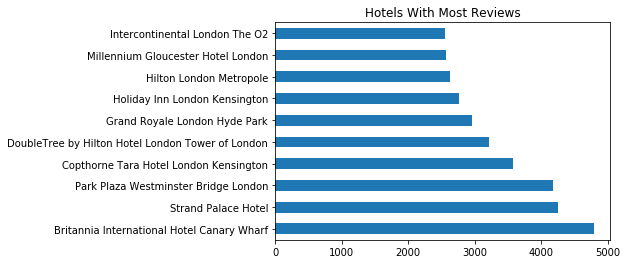

In [15]:
# Hotels with most reviews in dataset -- top 20
print(hotels['Hotel_Name'].value_counts().nlargest(20))

# Plot results -- top 10
hotels['Hotel_Name'].value_counts().nlargest(10).plot.barh(title = "Hotels With Most Reviews")

The Britannia International Hotel Canary Wharf has the most reviews in this dataset. It could be interesting to come back to this hotel after the model is complete and use this hotel as a test case for the sentiment analysis. 

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
Name: Reviewer_Nationality, dtype: int64


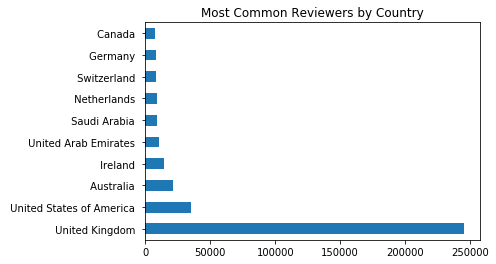

In [16]:
# Most common visitors by country -- top 20
print(hotels['Reviewer_Nationality'].value_counts().nlargest(20))

# Plot the results -- top 10
hotels['Reviewer_Nationality'].value_counts().nlargest(10).plot.barh(title = "Most Common Reviewers by Country")

Close to half of the reviews given come from individuals from the U.K. Let's dive into reviewer nationality a little more and see what we can find. 

### Ratings by Nationality:

In [18]:
# Highest ratings by nationality
nationality_scores['Reviewer_Score'].nlargest(10)

Reviewer_Nationality
 Comoros                     10.00000
 Crimea                      10.00000
 Equatorial Guinea           10.00000
 Svalbard Jan Mayen          10.00000
 Cape Verde                   9.60000
 Tajikistan                   9.35625
 Central Africa Republic      9.30000
 Saint Martin                 9.27500
 Gambia                       9.26000
 Burundi                      9.20000
Name: Reviewer_Score, dtype: float64

In [19]:
# Lowest ratings by nationality
nationality_scores['Reviewer_Score'].nsmallest(10)

Reviewer_Nationality
 Montserrat                   5.400000
 American Samoa               5.650000
 Northern Mariana Islands     5.800000
 Mali                         6.440000
 Nepal                        6.840000
 Afghanistan                  6.875000
 Gabon                        7.085714
 Tuvalu                       7.100000
 Lesotho                      7.233333
 Mongolia                     7.251282
Name: Reviewer_Score, dtype: float64

In [17]:
# Average review given by nationality of the top ten most common visitors
nationality_scores = hotels.groupby('Reviewer_Nationality')[['Reviewer_Score']].mean()

print(nationality_scores.loc[' United Kingdom '], '\n')
print(nationality_scores.loc[' United States of America '], '\n')
print(nationality_scores.loc[' Australia '], '\n')
print(nationality_scores.loc[' Ireland '], '\n')
print(nationality_scores.loc[' United Arab Emirates '], '\n')
print(nationality_scores.loc[' Saudi Arabia '], '\n')
print(nationality_scores.loc[' Netherlands '], '\n')
print(nationality_scores.loc[' Switzerland '], '\n')
print(nationality_scores.loc[' Germany '], '\n')
print(nationality_scores.loc[' Canada '])

Reviewer_Score    8.486352
Name:  United Kingdom , dtype: float64 

Reviewer_Score    8.786999
Name:  United States of America , dtype: float64 

Reviewer_Score    8.591718
Name:  Australia , dtype: float64 

Reviewer_Score    8.464052
Name:  Ireland , dtype: float64 

Reviewer_Score    7.878828
Name:  United Arab Emirates , dtype: float64 

Reviewer_Score    7.881767
Name:  Saudi Arabia , dtype: float64 

Reviewer_Score    8.125148
Name:  Netherlands , dtype: float64 

Reviewer_Score    8.161593
Name:  Switzerland , dtype: float64 

Reviewer_Score    8.132477
Name:  Germany , dtype: float64 

Reviewer_Score    8.547783
Name:  Canada , dtype: float64


Reviewers for the U.S. gave the highest scoring reviews with an average of 8.79, very close to the median of the dataset. Reviewers from the U.K. were just above the average at 8.49. The lowest reviews amongst the top ten came from Saudi Arabia and the United Arab Emirates both at 7.88. Now lets take a quick look at the highest rated hotels. 

### Hotel Ratings:

In [20]:
# Highest rated hotels by average score
hotels.groupby(['Hotel_Name']).Average_Score.mean().nlargest(20)

Hotel_Name
Ritz Paris                                      9.8
41                                              9.6
H tel de La Tamise Esprit de France             9.6
H10 Casa Mimosa 4 Sup                           9.6
Haymarket Hotel                                 9.6
Hotel The Serras                                9.6
Hotel Casa Camper                               9.6
Charlotte Street Hotel                          9.5
Ham Yard Hotel                                  9.5
Hotel Sacher Wien                               9.5
Hotel The Peninsula Paris                       9.5
Le Narcisse Blanc Spa                           9.5
Mercer Hotel Barcelona                          9.5
Milestone Hotel Kensington                      9.5
Palais Coburg Residenz                          9.5
Taj 51 Buckingham Gate Suites and Residences    9.5
The Soho Hotel                                  9.5
Waldorf Astoria Amsterdam                       9.5
Intercontinental London The O2                  9.4
C

In [21]:
# Hotels with most variance in review -- least consistant hotels
hotels.groupby(['Hotel_Name']).Reviewer_Score.std().nlargest(10)

Hotel_Name
Le Lavoisier                                 2.754280
MARQUIS Faubourg St Honor Relais Ch teaux    2.526983
Hotel Parco di Sch nbrunn Vienna             2.280302
Kube Hotel Ice Bar                           2.267247
Hotel Sezz Paris                             2.263318
Holiday Inn Paris Montparnasse Pasteur       2.250045
Windsor Opera                                2.229386
Le Grand H tel de Normandie                  2.228024
Hotel Astor Saint Honor                      2.225869
Villa Eugenie                                2.179269
Name: Reviewer_Score, dtype: float64

In [22]:
# Hotels with least variance in review -- most consistant hotels
hotels.groupby(['Hotel_Name']).Reviewer_Score.std().nsmallest(10)

Hotel_Name
H10 Casa Mimosa 4 Sup                                     0.427710
Hotel Casa Camper                                         0.499006
H tel de La Tamise Esprit de France                       0.505008
Le Narcisse Blanc Spa                                     0.538103
Hotel Eiffel Blomet                                       0.538340
45 Park Lane Dorchester Collection                        0.564035
41                                                        0.590497
Hotel Stendhal Place Vend me Paris MGallery by Sofitel    0.618336
H tel D Aubusson                                          0.622211
Hotel The Serras                                          0.626320
Name: Reviewer_Score, dtype: float64

### Ratings by Year & Month:

In [60]:
# Average Review Score by year
print("Average score by year", hotels.groupby(['Year']).Reviewer_Score.mean(), '\n')
print("Number of reviews by year \n", hotels['Year'].value_counts())

Average score by year Year
2015    8.319843
2016    8.424700
2017    8.390479
Name: Reviewer_Score, dtype: float64 

Number of reviews by year 
 2016    264403
2017    156808
2015     94527
Name: Year, dtype: int64


Month
1     8.485011
2     8.528058
3     8.479832
4     8.431530
5     8.381041
6     8.391419
7     8.335486
8     8.411738
9     8.290648
10    8.261577
11    8.338843
12    8.427132
Name: Reviewer_Score, dtype: float64


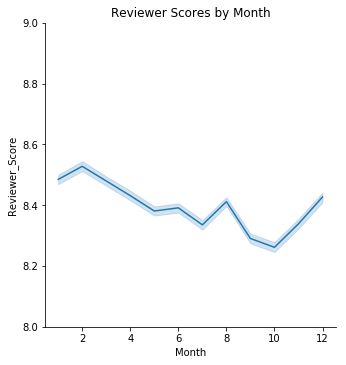

In [24]:
# Average Review Score by month 
print(hotels.groupby(['Month']).Reviewer_Score.mean())

sns.relplot(x = "Month", y = "Reviewer_Score", kind = 'line', data = hotels)
plt.ylim(8, 9)
plt.title('Reviewer Scores by Month')
plt.show()

In [61]:
# Number of visitors per month
hotels['Month'].value_counts()

8     50672
7     49318
5     46490
10    43843
6     42896
4     42883
9     42428
1     42151
3     41110
12    39607
2     38370
11    35970
Name: Month, dtype: int64

Over half of the reviews in this dataset come from 2016, however scores are pretty consistant across years. By month, reviewer scores appear to peak in February and are the lowest in October. However, the difference between these two months are pretty low, 8.53 compared to 8.26. July and August are the busiest times of the year which makes sense being the summer time. The winter months are the slowest times, specifically November.  

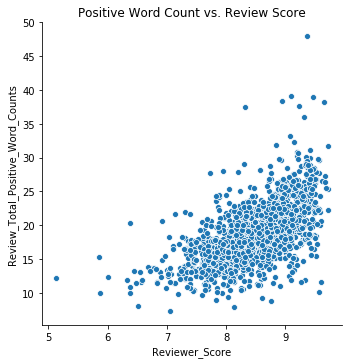

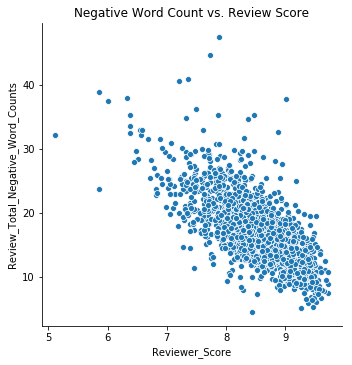

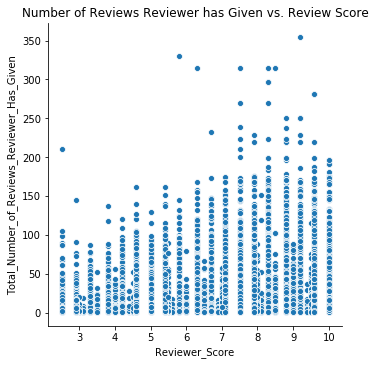

In [74]:
# Correlation between word counts and review scores

sns.relplot(x = "Reviewer_Score", y = "Review_Total_Positive_Word_Counts", data = hotel_stats)
plt.title('Positive Word Count vs. Review Score')
plt.show()

sns.relplot(x = "Reviewer_Score", y = "Review_Total_Negative_Word_Counts", data = hotel_stats)
plt.title('Negative Word Count vs. Review Score')
plt.show()

sns.relplot(x = "Reviewer_Score", y = "Total_Number_of_Reviews_Reviewer_Has_Given", data = hotels)
plt.title('Number of Reviews Reviewer has Given vs. Review Score')
plt.show()

There appears to be a correlation between both positive word counts and negative word counts with reviewer score. There may also be a slight correlation with the number of reviews a reviewer has given and score. Overall, I think these features could be examined further in the modelling phase. However, all of these variables had a lot of outliers so lets clean those up with winsorization. I'll set the outliers to the 90th percentile for all three. 

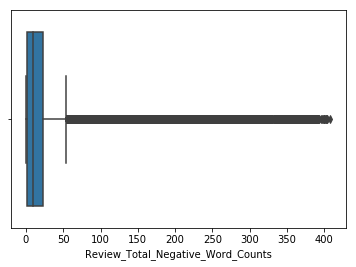

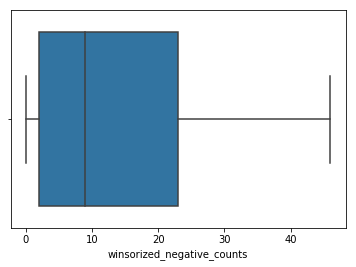

In [83]:
from scipy.stats.mstats import winsorize

# Winsorize Review_Total_Negative_Word_Counts
hotels['winsorized_negative_counts'] = winsorize(hotels['Review_Total_Negative_Word_Counts'], (0, 0.10))

sns.boxplot(x = hotels['Review_Total_Negative_Word_Counts'])
plt.show()

sns.boxplot(x = hotels['winsorized_negative_counts'])
plt.show()

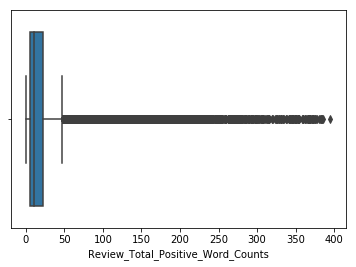

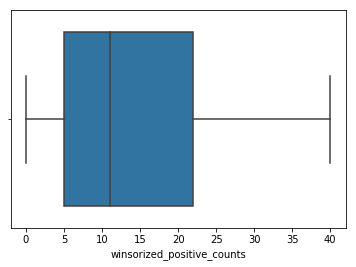

In [85]:
# Winsorize Review_Total_Positive_Word_Counts
hotels['winsorized_positive_counts'] = winsorize(hotels['Review_Total_Positive_Word_Counts'], (0, 0.10))

sns.boxplot(x = hotels['Review_Total_Positive_Word_Counts'])
plt.show()

sns.boxplot(x = hotels['winsorized_positive_counts'])
plt.show()

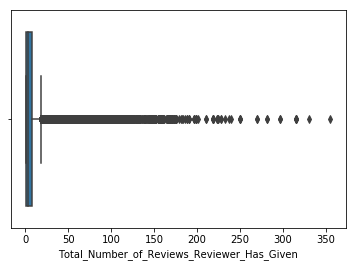

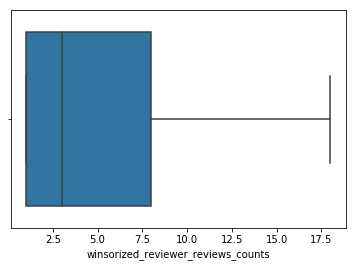

In [87]:
# Winsorize Total_Number_of_Reviews_Reviewer_Has_Given
hotels['winsorized_reviewer_reviews_counts'] = winsorize(hotels['Total_Number_of_Reviews_Reviewer_Has_Given'], (0, 0.10))

sns.boxplot(x = hotels['Total_Number_of_Reviews_Reviewer_Has_Given'])
plt.show()

sns.boxplot(x = hotels['winsorized_reviewer_reviews_counts'])
plt.show()

## Features Engineering

In [26]:
# Create a column separating reviewers from the U.K. from everyone else
def nationality(x):
    if x == ' United Kingdom ':
        return 1
    else:
        return 0

hotels['Reviewer_Nationality_dummies'] = hotels['Reviewer_Nationality'].apply(nationality)

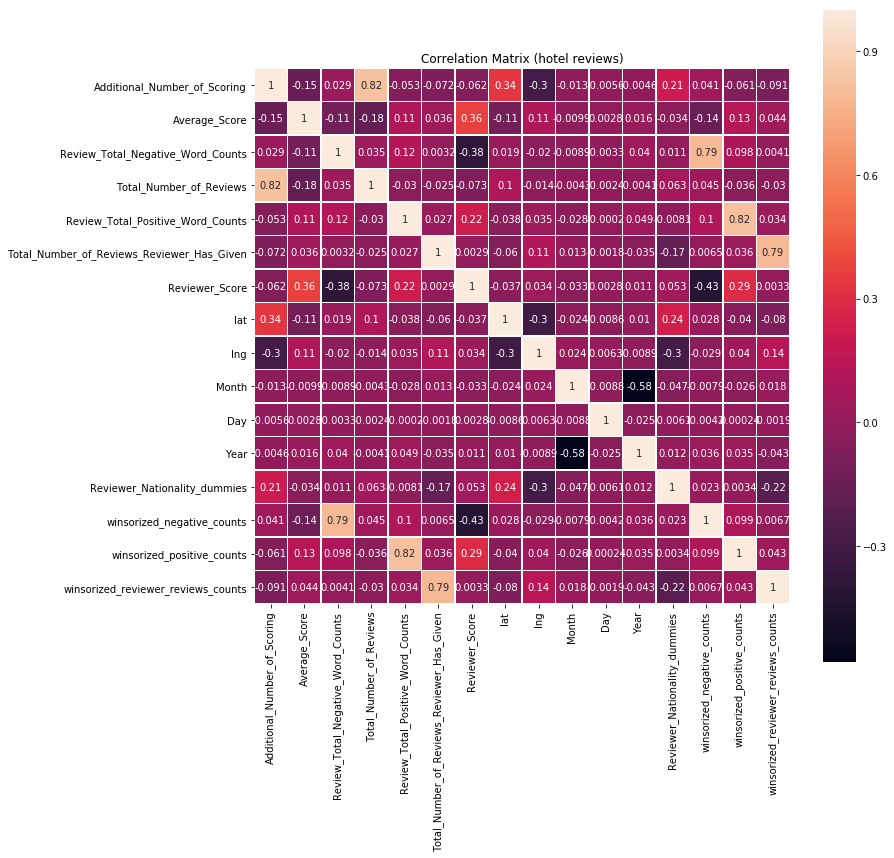

In [91]:
# Look at correlation matrix for numerical features
plt.figure(figsize = (12, 12))

cor_hotels = hotels.corr()
sns.heatmap(cor_hotels, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix (hotel reviews)")
plt.show()

### Text Analysis: 

So far we have only explored the numerical data, but now lets turn our attention to the actual reviews. First, we'll look at some word clouds to get a feel for what individuals are associating with positive and negative attributes of a hotel stay. Then we'll perform a tf-idf on both the positive and negative reviews to extract the most important words from both review features. 

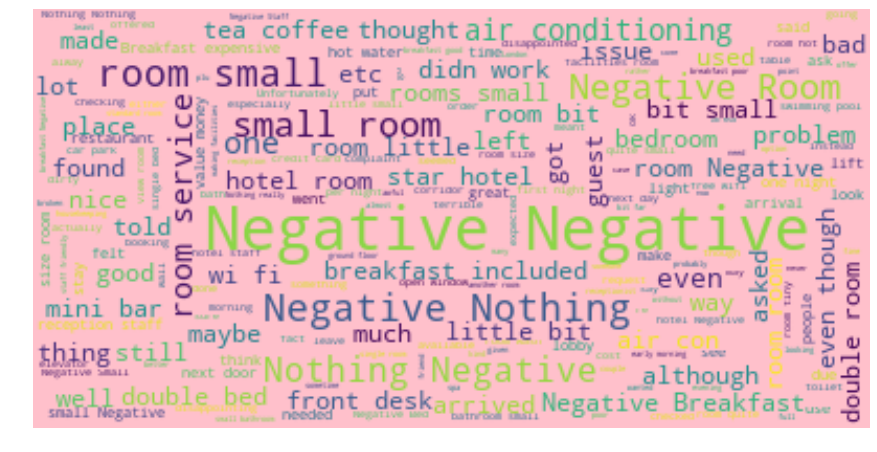

In [62]:
# Word cloud of negative reviews
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="pink").generate(" ".join(hotels["Negative_Review"]))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

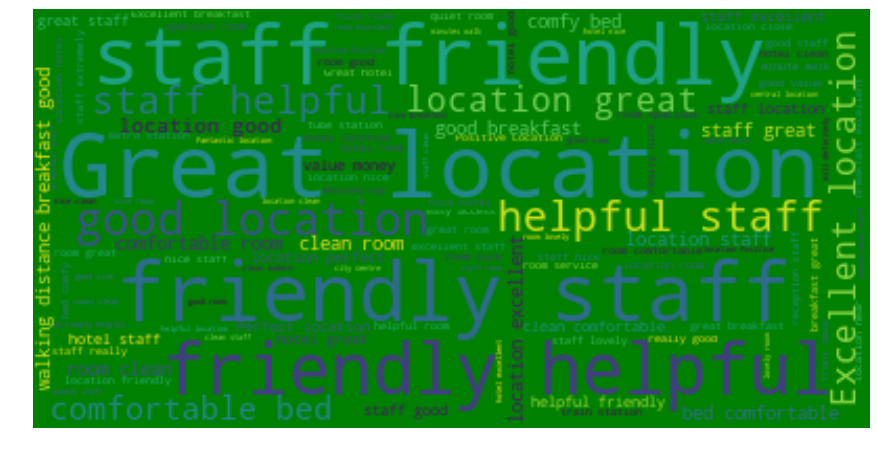

In [28]:
# Word cloud of positive reviews
wordcloud = WordCloud(background_color = "green").generate(" ".join(hotels["Positive_Review"]))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

plt.show()

Looking at the word clouds we get a good feel for what will lead to a positive review and what will get a negative review. Location and staff come up most frequently in the positive reviews, we also see having a clean room, good breakfast and comfortable bed show up in the positive reviews. In the negative reviews we also see that bad service seems to be a big factor, along with the small room size and other amenities like breakfast, air conditioning and wi-fi. One common method of text mining and extracting important words from a set is to vectorize them using the term frequency-inverse document frequency. Next we will perform this on both the negative and positive review columns and this will allow us to include the actual reviews into the models. 

In [5]:
# Create tf-idf sparse matrices
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp

v = TfidfVectorizer()
N = v.fit_transform(hotels['Negative_Review'])
P = v.fit_transform(hotels['Positive_Review'])

# combine both matrices
X = sp.hstack([N, P], format = 'csr')

## Models:

Now we can begin modelling the data. First, I want to model using only the numerical features and see how those are performing by themselves. Then I will do the same with the text data and compare them both. Finally, I will combine them and use the most accurate model to see how good our sentiment analysis predictions get. Since this is a classification problem, I'll look into various models including logistic regression, naive bayes, decision trees, K-nearest neighbors, random forest, and gradient boosting. Before that though I need to solve the class imbalance problem. I'll do this by down-sampling from my positive reviews. 

Negative    112117
Positive    110000
Name: Review, dtype: int64


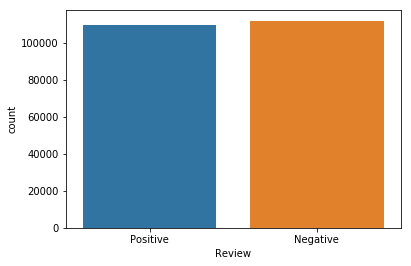

In [108]:
# Remove class imbalance
from sklearn.utils import resample

hotel_negative = hotels[hotels.Review == 'Negative']
hotel_positive = hotels[hotels.Review == 'Positive']

hotel_positive_downsampled = resample(hotel_positive, replace = False, n_samples = 110000)
hotel_downsampled = pd.concat([hotel_positive_downsampled, hotel_negative])

print(hotel_downsampled.Review.value_counts())

sns.countplot(x = 'Review', data = hotel_downsampled)
plt.show()

In [110]:
# Get features for modelling and set target
## note -- these are the best features I found after trial and error ##

X = hotel_downsampled[['Reviewer_Nationality_dummies', 'winsorized_positive_counts', 'winsorized_negative_counts']]
target = hotel_downsampled['Review']

In [111]:
# Split data into train and test sets -- 75% into training set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

In [112]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(lr, X, target, cv = 5))

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7520979650639295
[[20649  7328]
 [ 6438 21115]]


C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.7476139  0.74583558 0.75010693 0.74808095 0.75154762]


In [113]:
# Naive Bayes Model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(bnb, X, target, cv = 5))

0.6381055285431299
[[27059   918]
 [19178  8375]]
[0.64059968 0.64251306 0.63964613 0.63804786 0.63669721]


In [114]:
# Decision Tree Model
from sklearn import tree

# Decision Tree Model
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = 1, max_depth = 5)
dtc = decision_tree.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(cross_val_score(dtc, X, target, cv= 5))

0.748046101206555
[0.74833423 0.74610571 0.73401166 0.72779866 0.72095536]


In [115]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors = 1)
neighbors.fit(X_train, y_train)
y_pred = neighbors.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(cross_val_score(neighbors, X, target, cv= 5))

0.6716189447145687
[0.673915   0.66646407 0.69110596 0.66827995 0.67498818]


In [116]:
# Random Forest Model
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(cross_val_score(rfc, X, target, cv = 5))

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7569421934089682
[0.75380425 0.7545696  0.75350607 0.75161515 0.75157013]


In [117]:
# Gradient Boosting Model
params = {'n_estimators': 150,
          'max_depth': 2,
          'loss': 'deviance'}

gb = ensemble.GradientBoostingClassifier(**params)
gb.fit(X_train, y_train)

print(accuracy_score(y_test, gb.predict(X_test)))
print(cross_val_score(gb, X, target, cv = 5))

0.7641094903655682
[0.7626058  0.76051234 0.75983162 0.75562209 0.75985413]


After running all of the classification models, we got very similar accuracy on the logistic regression, decision tree, random forest and gradient boosting models. Lets now take a look at the tf-idf features and see how well they perform in the same models by themselves. 

In [136]:
# Get tf-idf for downsampled data

v = TfidfVectorizer()
N = v.fit_transform(hotel_downsampled['Negative_Review'])
P = v.fit_transform(hotel_downsampled['Positive_Review'])

# combine both matrices
X = sp.hstack([N, P], format = 'csr')
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [120]:
# Logistic Regression - Text
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(lr, X, target, cv = 5))

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8296056185845488
[[23764  4252]
 [ 5210 22304]]


C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.82973168 0.8302269  0.82785944 0.81687414 0.81588366]


In [121]:
# See which words have highest coefficients in logistic regression model
feature_coef = {word: coef for word, coef in zip(v.get_feature_names(), lr.coef_[0])}

for best_positive in sorted(
        feature_coef.items(),
        key = lambda x: x[1],
        reverse = True)[:10]:
        print (best_positive)       

('upgrades', 3.731764384008192)
('kovation', 3.353480891548458)
('cricklewood', 2.9728175845421463)
('locality', 2.8949601990853346)
('smoky', 2.5700534984041363)
('samir', 2.517282450408068)
('stray', 2.27360759986291)
('parting', 2.2000503995763543)
('comasina', 2.0177509743325337)
('roop', 1.9016655650735865)


In [122]:
# See which words have lowest coefficients in logistic regression model
for best_negative in sorted(
        feature_coef.items(),
        key = lambda x: x[1])[:10]:
        print (best_negative)

('gums', -4.441588192510946)
('carrefoursuper', -3.6956101741665437)
('palais', -3.107948265924019)
('drug', -2.9671575794575893)
('copmfy', -2.9612424088063696)
('swing', -2.8665576043829915)
('their', -2.8543955057974064)
('lovation', -2.8281680949638432)
('chanel', -2.7476795424820715)
('squirt', -2.7045155749843777)


In [123]:
# Naive Bayes Model - Text

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(bnb, X, target, cv = 5))

0.7470556455969746
[[18675  9341]
 [ 4705 22809]]
[0.75182334 0.74160364 0.75057965 0.73887401 0.75028701]


In [124]:
# Decision Tree Model- Text

decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = 1, max_depth = 5)
dtc = decision_tree.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(cross_val_score(dtc, X, target, cv= 5))

0.5045200792364488
[0.5047722  0.50474968 0.50476105 0.50476105 0.50476105]


In [137]:
# KNN model - Text

neighbors = KNeighborsClassifier(n_neighbors = 1)
neighbors.fit(X_train, y_train)
y_pred = neighbors.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5953898793444985


In [126]:
# Random Forest Model - Text

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7807131280388979


In [127]:
# Gradient Boosting Model - Text
params = {'n_estimators': 150,
          'max_depth': 2,
          'loss': 'deviance'}

gb = ensemble.GradientBoostingClassifier(**params)
gb.fit(X_train, y_train)

print(accuracy_score(y_test, gb.predict(X_test)))

0.7999819917161894


For the models using the actual review data, gradient boosting, random forest and logistic all performed really well at all above 78%. The logistic regression was best at over 82% so we will use the predictions from that to add to our dataframe. Then we will be able to include that with our other features in a final model. 

In [129]:
# Add predictions from logistic regression to data frame
lr = LogisticRegression()
lr.fit(X, target)
y_pred = lr.predict(X)
hotel_downsampled['TF-IDF'] = y_pred

In [132]:
# Create a column with numeric tf-idf predictions
def tfidf(x):
    if x == 'Positive':
        return 1
    else:
        return 0

hotel_downsampled['TF-IDF_dummies'] = hotel_downsampled['TF-IDF'].apply(tfidf)

### Final Model

In [138]:
# Combine models
X = hotel_downsampled[['TF-IDF_dummies', 'Reviewer_Nationality_dummies', 'winsorized_positive_counts', 'winsorized_negative_counts']]
target = hotel_downsampled['Review']
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(lr, X, target, cv = 5))

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8502070952638213
[[24183  3783]
 [ 4535 23029]]


C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.85480821 0.85539348 0.85023524 0.84571056 0.845598  ]


In [140]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(bnb, X, target, cv = 5))

0.8483882585989555
[[24200  3766]
 [ 4653 22911]]
[0.85291734 0.85336755 0.84802917 0.84350449 0.84395471]


In [139]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))

C:\Users\mike1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8448046101206556


In [141]:
params = {'n_estimators': 150,
          'max_depth': 2,
          'loss': 'deviance'}

gb = ensemble.GradientBoostingClassifier(**params)
gb.fit(X_train, y_train)

print(accuracy_score(y_test, gb.predict(X_test)))

0.8513956419953178


After combining together both the text data and numerical data we have improved the performance of all the models and are getting accuracy scores above 84% for each. The logistic regression model seems to be the best as it is close to the highest accuracy, only gradient boosting was slightly higher, but is also much faster than the others. 